In [283]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


In [284]:
img = cv2.imread('paper9.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [285]:
# print(img)
# print(imgray)

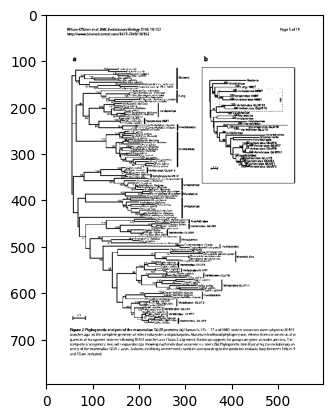

In [286]:
ret, thresh = cv2.threshold(imgray, 170, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.show()

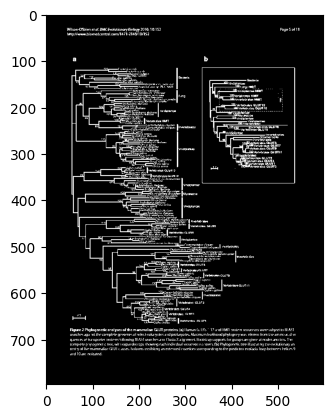

In [287]:
# Invert the grayscale image to make white areas black and vice versa
imgray_inv = cv2.bitwise_not(thresh)

# Apply thresholding to create a binary image
ret, thresh1 = cv2.threshold(imgray_inv, 130, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh1, cmap='gray')
plt.show()

In [288]:
array = np.array(thresh)


In [289]:
array.shape

(797, 597)

In [290]:
# print(array[4,0])
# print(array[4,1])
# print(array[:, 1:2])

In [291]:
#row
row_sums = np.sum(array, axis=1)

print("Shape of row_sums array:", row_sums.shape)

print(row_sums)

Shape of row_sums array: (797,)
[152235 152235 152235 152235 152235 152235 152235 152235 152235 152235
 152235 152235 152235 152235 152235 152235 152235 152235 152235 152235
 152235 152235 152235 152235 152235 152235 152235 152235 152235 152235
 133875 138720 119595 120105 125460 119595 150960 149940 152235 152235
 141270 142545 125970 127500 129540 127500 151980 151980 152235 152235
 152235 152235 152235 152235 152235 152235 152235 152235 152235 152235
 152235 152235 152235 152235 152235 152235 152235 152235 152235 152235
 152235 152235 152235 152235 152235 152235 152235 152235 152235 152235
 152235 152235 152235 152235 152235 152235 152235 152235 152235 152235
 152235 151725 151470 151470 149430 148665 149430 149175 149175 149175
 148665 149430 152235 152235 152235 152235 152235 152235 152235 152235
 152235 152235 152235 152235 152235 101235 148665 148920 138975 140250
 130815 131580 148410 135660 135405 148665 148665 148155 136680 137190
 124950 143820 138465 136170 139995 141015 14

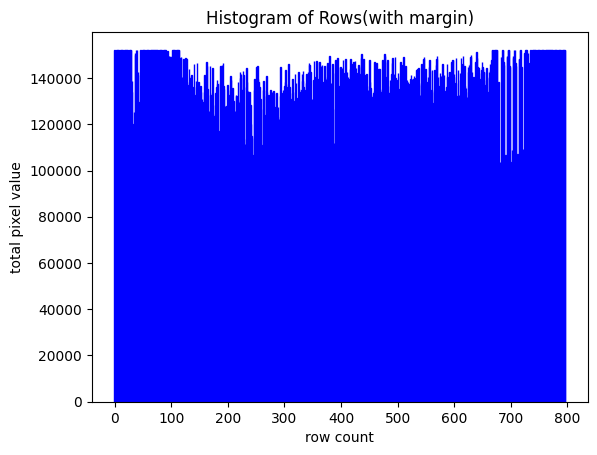

In [292]:

indices = np.arange(len(row_sums))

plt.bar(indices, row_sums, edgecolor='blue')

plt.title('Histogram of Rows(with margin)')
plt.xlabel('row count')
plt.ylabel('total pixel value')

plt.show()

In [293]:
########       Trim the top and bottom white margin     ############

def trim_white_margins(pixel_array):
    row_sums = np.sum(pixel_array, axis=1)
    num_columns = pixel_array.shape[1]
    white_row_sum = 255 * num_columns

    # Find the first non-white row from the top
    start_index = 0
    while start_index < len(row_sums) and row_sums[start_index] == white_row_sum:
        start_index += 1

    # Find the first non-white row from the bottom
    end_index = len(row_sums) - 1
    while end_index >= 0 and row_sums[end_index] == white_row_sum:
        end_index -= 1

    # Trim the pixel array
    row_trimmed_array = pixel_array[start_index:end_index+1, :]

    return row_trimmed_array


######### Crop out the left and right margin ###########
def trim_white_margins_lr(pixel_array):
    col_sums = np.sum(pixel_array, axis=0)
    num_rows = pixel_array.shape[0]
    white_col_sum = 255 * num_rows

    # Find the first non-white column from the left
    start_index = 0
    while start_index < len(col_sums) and col_sums[start_index] == white_col_sum:
        start_index += 1

    # Find the first non-white column from the right
    end_index = len(col_sums) - 1
    while end_index >= 0 and col_sums[end_index] == white_col_sum:
        end_index -= 1

    # Trim the pixel array
    col_trimmed_array = pixel_array[:, start_index:end_index+1]

    return col_trimmed_array

row_trimmed_array = trim_white_margins(array)
marginless_array = trim_white_margins_lr(row_trimmed_array)

print("Marginless Array:")
print(marginless_array)
marginless_array.shape


Marginless Array:
[[  0   0 255 ...   0   0   0]
 [255   0 255 ... 255   0   0]
 [255   0 255 ... 255   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(705, 501)

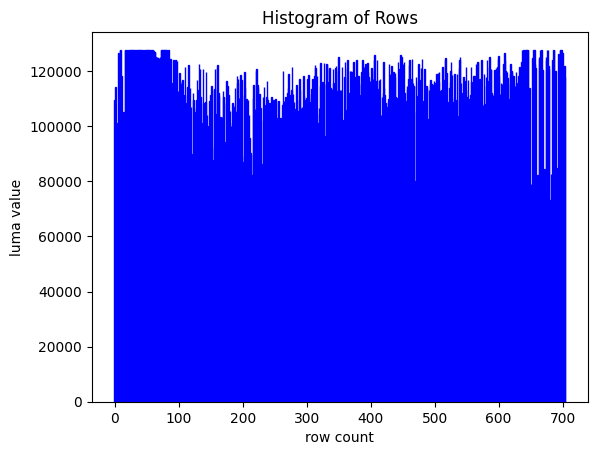

In [294]:
row_sums = np.sum(marginless_array, axis=1)
indices = np.arange(len(row_sums))

plt.bar(indices, row_sums, edgecolor='blue')

plt.title('Histogram of Rows')
plt.xlabel('row count')
plt.ylabel('luma value')

plt.show()


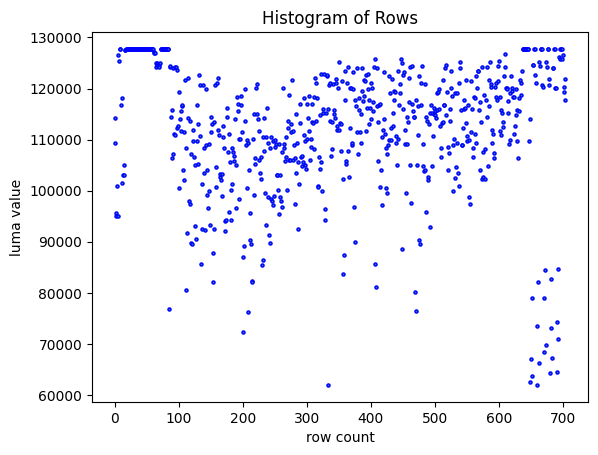

In [295]:
row_sums = np.sum(marginless_array, axis=1)
indices = np.arange(len(row_sums))

plt.scatter(indices, row_sums, edgecolor='blue', s=5)

plt.title('Histogram of Rows')
plt.xlabel('row count')
plt.ylabel('luma value')

plt.show()

In [296]:
marginless_array_row_sums = np.sum(marginless_array, axis=1)
print (marginless_array_row_sums.shape)

def convert_non_255_to_zero(marginless_array, marginless_array_row_sums):
  new_arr = np.where(marginless_array_row_sums != 255*marginless_array.shape[1], 0, marginless_array_row_sums)
  return new_arr

# Convert non-255 values to 0 and store in another array
marginless_array_improved_row_sum = convert_non_255_to_zero(marginless_array, marginless_array_row_sums)
print(marginless_array_improved_row_sum)


(705,)
[     0      0      0      0      0      0      0      0 127755 127755
      0      0      0      0      0      0      0      0 127755 127755
 127755 127755 127755 127755 127755 127755 127755 127755 127755 127755
 127755 127755 127755 127755 127755 127755 127755 127755 127755 127755
 127755 127755 127755 127755 127755 127755 127755 127755 127755 127755
 127755 127755 127755 127755 127755 127755 127755 127755 127755 127755
 127755      0      0      0      0      0      0      0      0      0
      0      0 127755 127755 127755 127755 127755 127755 127755 127755
 127755 127755 127755 127755 127755      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0

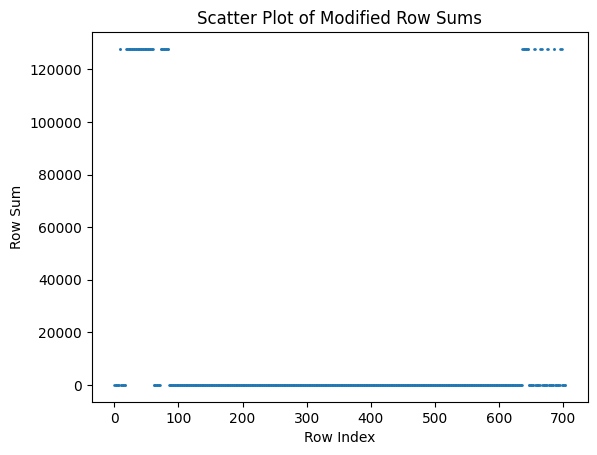

In [297]:
plt.scatter(range(len(marginless_array_improved_row_sum)), marginless_array_improved_row_sum, s=0.75)
plt.xlabel('Row Index')
plt.ylabel('Row Sum')
plt.title('Scatter Plot of Modified Row Sums')
plt.show()


In [298]:
# np.savetxt('large_array.txt', marginless_array, fmt='%d')


In [299]:
from scipy import stats
def calculate_row_sums(image, threshold=255):
    num_rows, num_columns = image.shape
    white_row_sum = threshold * num_columns
    row_sums = np.sum(image, axis=1)
    return row_sums, white_row_sum

def identify_line_gaps(row_sums, white_row_sum):
    white_space_lengths = []
    current_length = 0

    for value in row_sums:
        if value == white_row_sum:
            current_length += 1
        else:
            if current_length > 0:
                white_space_lengths.append(current_length)
                current_length = 0

    if current_length > 0:
        white_space_lengths.append(current_length)

    if white_space_lengths:
        average_line_gap = np.mean(white_space_lengths)
    else:
        average_line_gap = 0

    return average_line_gap, white_space_lengths, white_space_lengths

def find_significant_gaps(row_sums, white_row_sum, average_line_gap, gap_multiplier=2.3):
    significant_gaps = []
    current_length = 0
    significant_threshold = average_line_gap * gap_multiplier
    print(significant_threshold)

    for i, value in enumerate(row_sums):
        if value == white_row_sum:
            current_length += 1
        else:
            if current_length >= significant_threshold:
                significant_gaps.append((i - current_length, i))
            current_length = 0

    if current_length > significant_threshold:
        significant_gaps.append((len(row_sums) - current_length, len(row_sums)))

    return significant_gaps

def divide_image(image, significant_gaps):
    parts = []
    start = 0
    for gap_start, gap_end in significant_gaps:
        parts.append((start, gap_start))
        start = gap_end
    parts.append((start, image.shape[0]))
    return parts

row_sums, white_row_sum = calculate_row_sums(marginless_array)
average_line_gap, white_space_lengths, white_pixel_row_array = identify_line_gaps(row_sums, white_row_sum)
significant_gaps = find_significant_gaps(row_sums, white_row_sum, average_line_gap)#average


print("Average Line Gap Height:", average_line_gap)
#print("Line gap mode value", significant_gaps_by_mode)

print("Significant Gaps (row indices):", significant_gaps)
#print("Line gap mode count", mode_count)


parts = divide_image(marginless_array, significant_gaps)
print(parts)
# for i, part in enumerate(parts):
#     print(f"Part {i + 1} shape:", part.shape)


20.444444444444443
Average Line Gap Height: 8.88888888888889
Significant Gaps (row indices): [(18, 61)]
[(0, 18), (61, 705)]


2


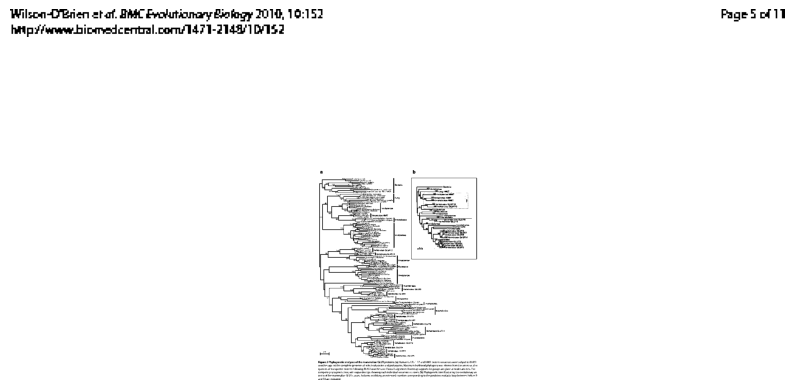

In [300]:
def display_image_parts(image, parts):
    num_parts = len(parts)
    print(num_parts)
    fig, axes = plt.subplots(num_parts, 1, figsize=(10, num_parts * 3))
    if num_parts == 1:
        axes = [axes]  # To handle the case when there's only one part
    for i, (start, end) in enumerate(parts):
        part = image[start:end, 0:image.shape[1]]
        axes[i].imshow(part, cmap='gray')
        axes[i].axis('off')
    plt.show()

display_image_parts(marginless_array, parts)

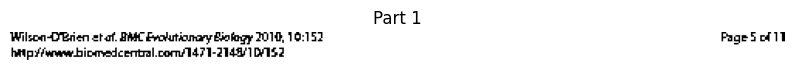

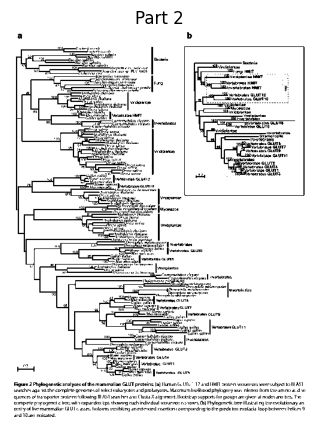

In [301]:
def display_image_parts_separately(image, parts):
    for i, (start, end) in enumerate(parts):
        part = image[start:end, 0:image.shape[1]]
        plt.figure(figsize=(10, 5))
        plt.imshow(part, cmap='gray')
        plt.axis('off')
        plt.title(f'Part {i + 1}')
        plt.show()

display_image_parts_separately(marginless_array, parts)


In [302]:
def identify_line_gaps(row_sums, white_row_sum):
    white_space_lengths = []
    current_length = 0

    for value in row_sums:
        if value == white_row_sum:
            current_length += 1
        else:
            if current_length > 0:
                white_space_lengths.append(current_length)
                current_length = 0

    if current_length > 0:
        white_space_lengths.append(current_length)

    if white_space_lengths:
      mode_result = stats.mode(white_space_lengths)
        # Check if the mode result contains any mode value
      if mode_result.mode.size > 0:
          average_line_gap = mode_result.mode
      #  average_line_gap = stats.mode(white_space_lengths).mode[0]#mode
    else:
        average_line_gap = 0

    return average_line_gap, white_space_lengths, white_space_lengths #mode

def find_significant_gaps(row_sums, white_row_sum, average_line_gap, gap_multiplier=3.2):#mode
    significant_gaps = []
    current_length = 0
    significant_threshold = average_line_gap * gap_multiplier #mode
    print(significant_threshold)

    for i, value in enumerate(row_sums):
        if value == white_row_sum:
            current_length += 1
        else:
            if current_length >= significant_threshold:
                significant_gaps.append((i - current_length, i))
            current_length = 0

    if current_length > significant_threshold:
        significant_gaps.append((len(row_sums) - current_length, len(row_sums)))

    return significant_gaps
    #print(significant_gaps)

def divide_image(image, significant_gaps):
    parts = []
    start = 0
    for gap_start, gap_end in significant_gaps:
        parts.append((start, gap_start))
        start = gap_end
    parts.append((start, image.shape[0]))
    return parts

average_line_gap, white_space_lengths, white_pixel_row_array = identify_line_gaps(row_sums, white_row_sum)
significant_gaps = find_significant_gaps(row_sums, white_row_sum, average_line_gap) #mode


print("Average Line Gap Height:", average_line_gap) #mode

print("Significant Gaps (row indices):", significant_gaps)
#print("Line gap mode count", mode_count)


parts = divide_image(marginless_array, significant_gaps)
print(parts)
# for i, part in enumerate(parts):
#     print(f"Part {i + 1} shape:", part.shape)


6.4
Average Line Gap Height: 2
Significant Gaps (row indices): [(18, 61), (72, 85), (637, 647)]
[(0, 18), (61, 72), (85, 637), (647, 705)]


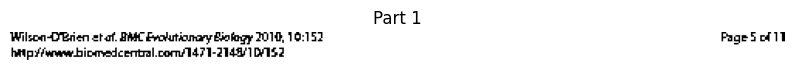

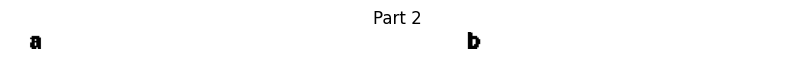

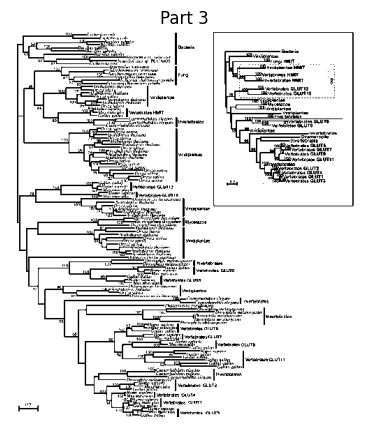

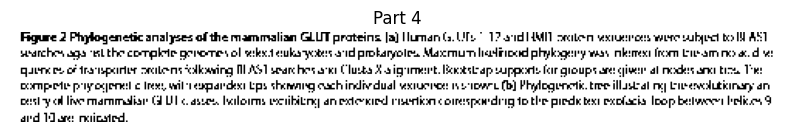

In [303]:
def display_image_parts_separately(image, parts):
    for i, (start, end) in enumerate(parts):
        part = image[start:end, 0:image.shape[1]]
        plt.figure(figsize=(10, 5))
        plt.imshow(part, cmap='gray')
        plt.axis('off')
        plt.title(f'Part {i + 1}')
        plt.show()

display_image_parts_separately(marginless_array, parts)


In [304]:
print(parts)

[(0, 18), (61, 72), (85, 637), (647, 705)]


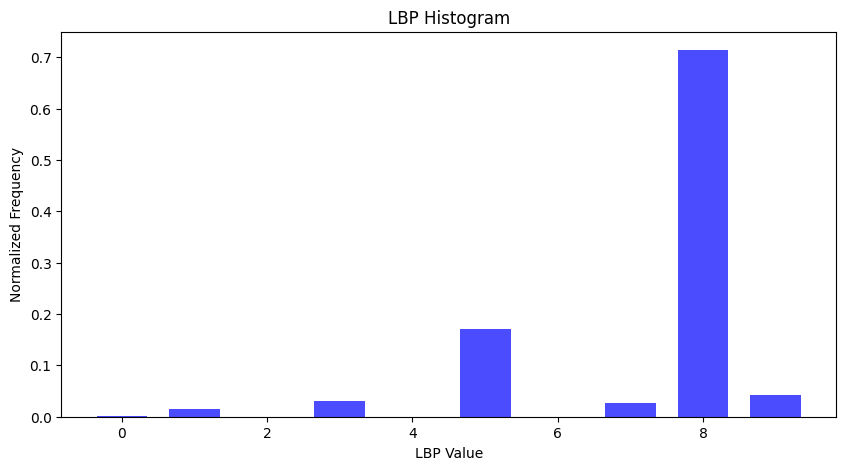

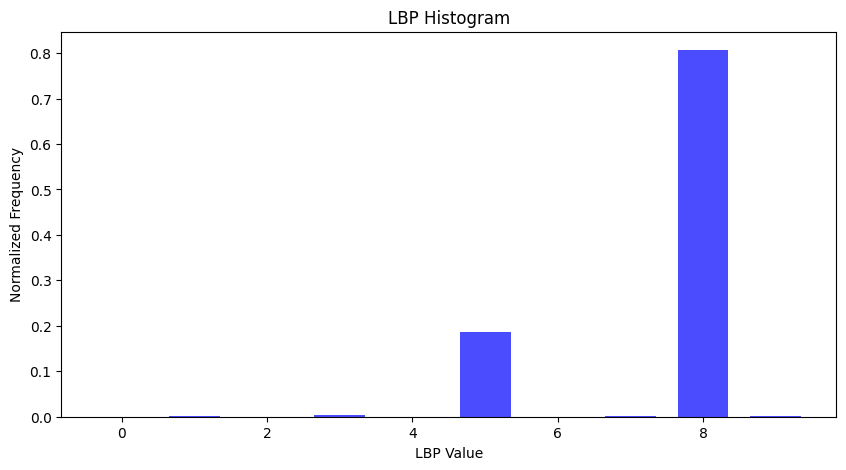

Part from rows 61 to 72 likely contains figures.


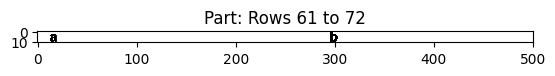

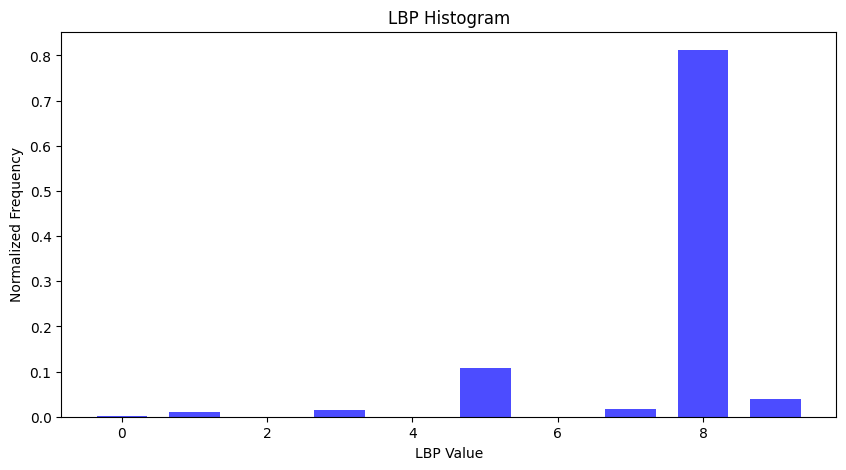

Part from rows 85 to 637 likely contains figures.


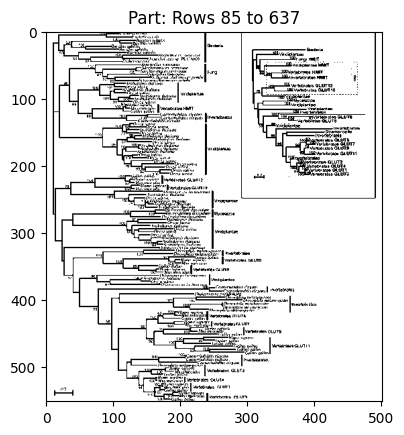

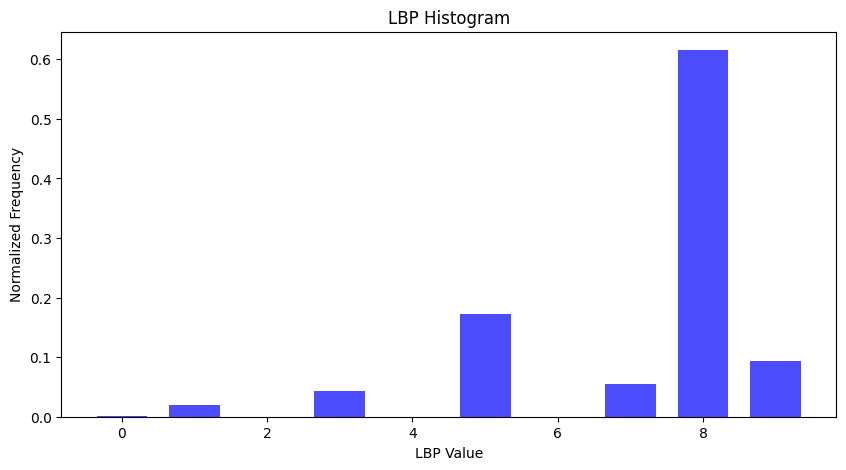

In [305]:
# Function to analyze texture using Local Binary Patterns (LBP)
def analyze_texture(image_part, P=8, R=1):
    lbp = local_binary_pattern(image_part, P, R, method='uniform')
    return lbp

# Function to determine if the texture is significant
def has_significant_texture(lbp, threshold=0.75):
    P = 8
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize the histogram


    plt.figure(figsize=(10, 5))
    plt.bar(np.arange(0, P + 2), hist, width=0.7, color='blue', alpha=0.7)
    plt.title("LBP Histogram")
    plt.xlabel("LBP Value")
    plt.ylabel("Normalized Frequency")
    plt.show()

    return hist.max() > threshold

def display_image_parts(image, parts):
    for i, (start, end) in enumerate(parts):
        part = image[start:end, 0:image.shape[1]]
        plt.figure()
        plt.imshow(part, cmap='gray')
        plt.title(f'Part {i+1}: Rows {start} to {end}')
        plt.show()


# Load the image (assuming it's already loaded as 'image')
# Assuming 'image' is a 2D numpy array (grayscale)


for start, end in parts:
    part = marginless_array[start:end, 0:marginless_array.shape[1]]
    lbp = analyze_texture(part)
    if has_significant_texture(lbp):
        print(f"Part from rows {start} to {end} likely contains figures.")

        plt.figure()
        plt.imshow(part, cmap='gray')
        plt.title(f'Part: Rows {start} to {end}')
        plt.show()


